In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

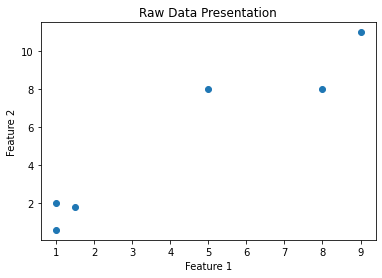

In [3]:
plt.scatter(x[:,0],x[:,1])
plt.title('Raw Data Presentation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
class KMeans:
    def __init__(self, k=2, n_iter=100):
        print('Contructor Called')
        self.k = k
        self.n_iter = n_iter
        
    def fit(self, data):
        
         # Random Initialization of Cluster Centroids
        self.means = np.array([data[self.k-i] for i in range(self.k)])
        
        # Cluster Assignment and Centroid Updation Steps
        for i in range(self.n_iter):
            
            # 1. Assignment of data points to clusters
            clusters = []
            for j in range(self.k):
                clusters.append([])
                
            for point in data:
                # distances will have distance of this data point from all centroids
                distances = [((point - m )**2).sum() for m in self.means ]
                min_dist = min(distances)
                # find mean (centroid) for which we got minimum distance --> "cluster_assigned" (let's say)
                cluster_assigned = distances.index(min_dist)
                # add this point to cluster "cluster_assigned"
                clusters[cluster_assigned].append(point)
            
            # 2. Find new centroids
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis=0)
                change = False
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
                if not change:
                    break
                    
    def predict(self, data):
        predictions = []
        for point in data:
            distances = [((point-m)**2).sum() for m in self.means]
            min_dist = min(distances)
            cluster_assigned = distances.index(min_dist)
            predictions.append(cluster_assigned)
        return predictions

In [5]:
k_means = KMeans(2,10)

Contructor Called


In [6]:
k_means.fit(x)
predictions = k_means.predict(x)
predictions

[1, 1, 0, 0, 1, 0]

In [7]:
k_means.means # cluster centres

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

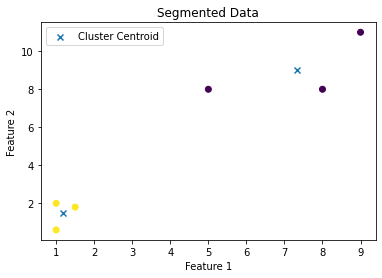

In [8]:
plt.scatter(x[:,0], x[:,1], c = predictions)
plt.scatter(k_means.means[:,0],k_means.means[:,1], marker='x', label = 'Cluster Centroid')
plt.title('Segmented Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()